In [2]:
!pip install opencv-python-headless matplotlib

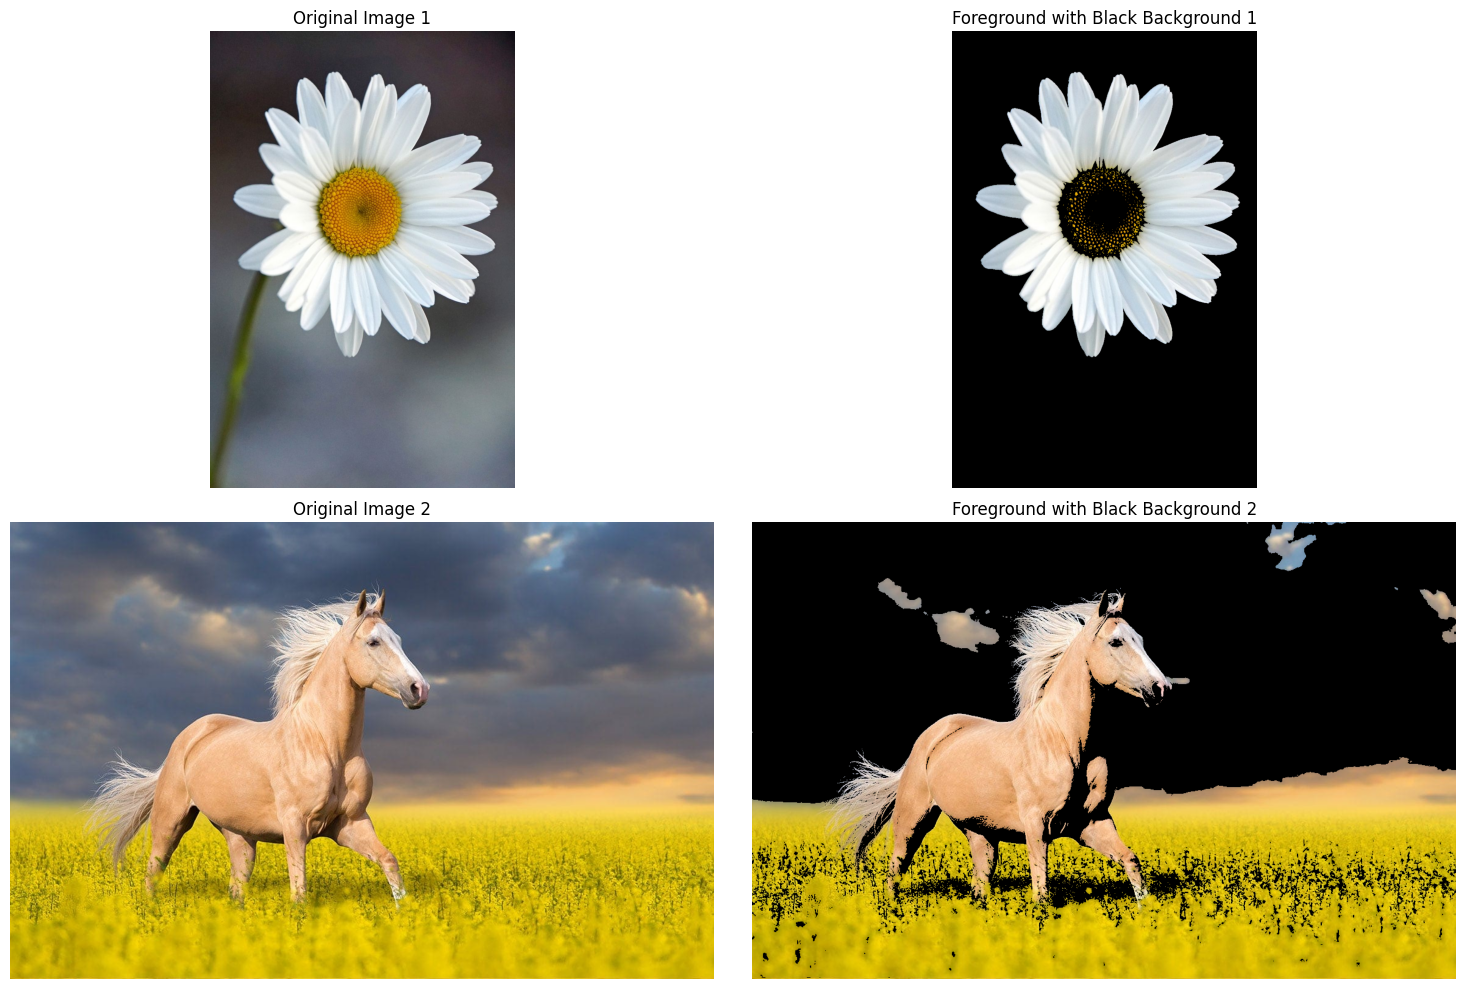

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def iterative_thresholding(image, max_iterations=100, epsilon=1e-5):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threshold = np.mean(gray_image)

    for i in range(max_iterations):
        foreground = gray_image[gray_image > threshold]
        background = gray_image[gray_image <= threshold]

        new_threshold = (np.mean(foreground) + np.mean(background)) / 2

        if abs(new_threshold - threshold) < epsilon:
            break
        threshold = new_threshold

    _, binary_image = cv2.threshold(gray_image, int(threshold), 255, cv2.THRESH_BINARY)

    return binary_image

image_path1 = 'image1.jpg'
image_path2 = 'image2.jpg'

image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

binary_image1 = iterative_thresholding(image1)
binary_image2 = iterative_thresholding(image2)

def create_result_image(original_image, binary_image):
    result_image = np.zeros_like(original_image)
    mask = binary_image == 255
    result_image[mask] = original_image[mask]
    return result_image

result_image1 = create_result_image(image1, binary_image1)
result_image2 = create_result_image(image2, binary_image2)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Original Image 1")
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Foreground with Black Background 1")
plt.imshow(cv2.cvtColor(result_image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Foreground with Black Background 2")
plt.imshow(cv2.cvtColor(result_image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Original Image 2")
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()